In [1]:
# Import and concatenate
import pandas as pd
import ast

# Define a function to load, process, and add a city column to the dataset
def load_and_process_dataset(filepath, city_name):
    df = pd.read_excel(filepath)
    
    # Convert columns from string to dictionary
    df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)
    df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)
    df['new_car_feature'] = df['new_car_feature'].apply(ast.literal_eval)
    df['new_car_specs'] = df['new_car_specs'].apply(ast.literal_eval)
    
    # Add a column for the city
    df['City'] = city_name
    
    # Extract relevant fields from 'new_car_detail'
    df['Ignition_type'] = df['new_car_detail'].apply(lambda x: x.get('it'))
    df['Fuel_type'] = df['new_car_detail'].apply(lambda x: x.get('ft'))
    df['Body_type'] = df['new_car_detail'].apply(lambda x: x.get('bt'))
    df['Kilometers_driven'] = df['new_car_detail'].apply(lambda x: x.get('km'))
    df['Transmission_type'] = df['new_car_detail'].apply(lambda x: x.get('transmission'))
    df['No_of_previous_owners'] = df['new_car_detail'].apply(lambda x: x.get('ownerNo'))
    df['Ownership_details'] = df['new_car_detail'].apply(lambda x: x.get('owner'))
    df['Original_Equipment_Manufacturer'] = df['new_car_detail'].apply(lambda x: x.get('oem'))
    df['Car_model'] = df['new_car_detail'].apply(lambda x: x.get('model'))
    df['Year_of_car_manufacture'] = df['new_car_detail'].apply(lambda x: x.get('modelYear'))
    df['Central_variant_ID'] = df['new_car_detail'].apply(lambda x: x.get('centralVariantId'))
    df['Variant_name'] = df['new_car_detail'].apply(lambda x: x.get('variantName'))
    df['Price_of_the_used_car'] = df['new_car_detail'].apply(lambda x: x.get('price'))
    df['Actual_price'] = df['new_car_detail'].apply(lambda x: x.get('priceActual'))
    df['Price_saving_information'] = df['new_car_detail'].apply(lambda x: x.get('priceSaving'))
    df['Fixed_price_details'] = df['new_car_detail'].apply(lambda x: x.get('priceFixedText'))
    df['trending_imgUrl'] = df['new_car_detail'].apply(lambda x: x['trendingText']['imgUrl'] if 'trendingText' in x and x['trendingText'] else None)
    df['trending_heading'] = df['new_car_detail'].apply(lambda x: x['trendingText']['heading'] if 'trendingText' in x and x['trendingText'] else None)
    df['trending_desc'] = df['new_car_detail'].apply(lambda x: x['trendingText']['desc'] if 'trendingText' in x and x['trendingText'] else None)
    
    # Define a function to extract 'top' data (both 'value' and 'icon') from 'new_car_overview'
    def extract_top_data(row, key_name, field):
        top_data = row.get('top', [])
        for item in top_data:
            if item['key'] == key_name:
                return item.get(field)
        return None
    
    # Extract values and icons for specific keys in 'new_car_overview'
    df['Registration Year'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Registration Year', 'value'))
    df['Registration Year Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Registration Year', 'icon'))
    df['Insurance Validity'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Insurance Validity', 'value'))
    df['Insurance Validity Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Insurance Validity', 'icon'))
    df['Fuel Type'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Fuel Type', 'value'))
    df['Fuel Type Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Fuel Type', 'icon'))
    df['Seats'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Seats', 'value'))
    df['Seats Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Seats', 'icon'))
    df['Kms Driven'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Kms Driven', 'value'))
    df['Kms Driven Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Kms Driven', 'icon'))
    df['RTO'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'RTO', 'value'))
    df['RTO Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'RTO', 'icon'))
    df['Ownership'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Ownership', 'value'))
    df['Ownership Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Ownership', 'icon'))
    df['Engine Displacement'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Engine Displacement', 'value'))
    df['Engine Displacement Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Engine Displacement', 'icon'))
    df['Transmission'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Transmission', 'value'))
    df['Transmission Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Transmission', 'icon'))
    df['Year of Manufacture'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Year of Manufacture', 'value'))
    df['Year of Manufacture Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Year of Manufacture', 'icon'))
    
    # Define a function to extract 'top' features from 'new_car_feature'
    def extract_top_features(row):
        top_features = row.get('top', [])
        return [item['value'] for item in top_features]
    
    # Define a function to extract 'data' features from 'new_car_feature'
    def extract_data_features(row, heading_name):
        data_features = row.get('data', [])
        for item in data_features:
            if item['heading'] == heading_name:
                return [sub_item['value'] for sub_item in item.get('list', [])]
        return None
    
    # Extract 'top' features and 'data' features from 'new_car_feature'
    df['Top Features'] = df['new_car_feature'].apply(lambda x: extract_top_features(x))
    df['Top Features'] = df['Top Features'].apply(lambda x: ', '.join(x) if x else '')
    df['Comfort & Convenience'] = df['new_car_feature'].apply(lambda x: extract_data_features(x, 'Comfort & Convenience'))
    df['Comfort & Convenience'] = df['Comfort & Convenience'].apply(lambda x: ', '.join(x) if x else '')
    df['Interior'] = df['new_car_feature'].apply(lambda x: extract_data_features(x, 'Interior'))
    df['Interior'] = df['Interior'].apply(lambda x: ', '.join(x) if x else '')
    df['Exterior'] = df['new_car_feature'].apply(lambda x: extract_data_features(x, 'Exterior'))
    df['Exterior'] = df['Exterior'].apply(lambda x: ', '.join(x) if x else '')
    df['Safety'] = df['new_car_feature'].apply(lambda x: extract_data_features(x, 'Safety'))
    df['Safety'] = df['Safety'].apply(lambda x: ', '.join(x) if x else '')
    
    # Define a function to extract 'top' specs from 'new_car_specs'
    def extract_top_specs(row, key_name):
        top_data = row.get('top', [])
        for item in top_data:
            if item['key'] == key_name:
                return item['value']
        return None
    
    # Define a function to extract 'data' values from 'new_car_specs'
    def extract_data_specs(row, heading, subheading, key_name):
        data = row.get('data', [])
        for item in data:
            if item['heading'] == heading:
                for subitem in item.get('list', []):
                    if subitem['key'] == key_name:
                        return subitem['value']
        return None
    
    # Extract specific specs from 'new_car_specs'
    df['Mileage'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Mileage'))
    df['Engine'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Engine'))
    df['Max Power'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Max Power'))
    df['Torque'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Torque'))
    df['No_Seats'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Seats'))
    # Extract engine and transmission specs from 'new_car_specs'
    df['Color'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Color'))
    df['Engine Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Engine Type'))
    df['Displacement'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Displacement'))
    df['Max Power@rpm'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Max Power'))
    df['Max Torque@rpm'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Max Torque'))
    df['No of Cylinder'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'No of Cylinder'))
    df['Values per Cylinder'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Values per Cylinder'))
    df['Value Configuration'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Value Configuration'))
    df['Fuel Suppy System'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Fuel Suppy System'))
    df['BoreX Stroke'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'BoreX Stroke'))
    df['Compression Ratio'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Compression Ratio'))
    df['Turbo Charger'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Turbo Charger'))
    df['Super Charger'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Super Charger'))
    # Extract Dimensions & Capacity specs from 'new_car_specs'
    df['Length'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Length'))
    df['Width'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Width'))
    df['Height'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Height'))
    df['Wheel Base'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Wheel Base'))
    df['Front Tread'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Front Tread'))
    df['Rear Tread'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Rear Tread'))
    df['Kerb Weight'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Kerb Weight'))
    df['Gross Weight'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Gross Weight'))
    # Extract Miscellaneous specs from 'new_car_specs'
    df['Gear Box'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Gear Box'))
    df['Drive Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Drive Type'))
    df['Seating Capacity'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Seating Capacity'))
    df['Steering Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Steering Type'))
    df['Turning Radius'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Turning Radius'))
    df['Front Brake Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Front Brake Type'))
    df['Rear Brake Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Rear Brake Type'))
    df['Top Speed'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Top Speed'))
    df['Acceleration'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Acceleration'))
    df['Tyre Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Tyre Type'))
    df['No Door Numbers'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'No Door Numbers'))
    df['Cargo Volumn'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Cargo Volumn'))
    
    return df

# Filepaths for the six cities (replace with actual file paths)
filepaths = {
    'Bangalore': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\bangalore_cars.xlsx",
    'Chennai': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\chennai_cars.xlsx",
    'Delhi': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\delhi_cars.xlsx",
    'Hyderabad': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\hyderabad_cars.xlsx",
    'Jaipur': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\jaipur_cars.xlsx",   
    'Kolkata': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\kolkata_cars.xlsx"
    
}

# Load, process, and concatenate datasets for all cities
all_cities_df = pd.concat([load_and_process_dataset(filepath, city) for city, filepath in filepaths.items()])
all_cities_df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,City,Ignition_type,Fuel_type,Body_type,Kilometers_driven,...,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore,0,Petrol,Hatchback,"1,20,000",...,5,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore,0,Petrol,SUV,"32,706",...,5,Power,5.3 metres,Ventilated Disc,Drum,None,None,"Tubeless,Radial",4,352-litres
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore,0,Petrol,Hatchback,"11,949",...,5,Power,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore,0,Petrol,Sedan,"17,794",...,5,Power,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore,0,Diesel,SUV,"60,000",...,5,Power,5.2 meters,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,0,Petrol,Hatchback,"10,000",...,5,Electric,None,Ventilated Disc,Drum,None,None,"Tubeless, Radial",5,313
1377,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,0,Petrol,Hatchback,"1,20,000",...,5,Power,4.6 metres,Solid Disc,Drum,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres
1378,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,0,Petrol,Sedan,"50,000",...,5,Power,5.42 metres,Ventilated Disc,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres
1379,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,0,Petrol,Hatchback,"40,000",...,5,Power,4.7 metres,Ventilated Disc,Drum,156 Kmph,15 Seconds,"Tubeless,Radial",5,236-liters


In [2]:
all_cities_df.drop(columns=['new_car_detail',
                            'new_car_overview',
                            'new_car_feature','new_car_specs',
                            'car_links','Engine','Ignition_type',
                            'No_Seats','Fixed_price_details','Ownership_details',
                            'Price_saving_information','Displacement',
                            'Seating Capacity','Kms Driven'], axis=1,inplace=True)

In [3]:
missing_values_df = all_cities_df.isnull().sum().reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

# Display the DataFrame
print(missing_values_df)

               Column  Missing Values
0                City               0
1           Fuel_type               0
2           Body_type               0
3   Kilometers_driven               0
4   Transmission_type               0
..                ...             ...
69          Top Speed            3762
70       Acceleration            3512
71          Tyre Type              77
72    No Door Numbers              11
73       Cargo Volumn            1593

[74 rows x 2 columns]


In [4]:
missing_values_df.to_csv('cardekho_missing_values.csv', index=False)

In [5]:
all_cities_df.columns

Index(['City', 'Fuel_type', 'Body_type', 'Kilometers_driven',
       'Transmission_type', 'No_of_previous_owners',
       'Original_Equipment_Manufacturer', 'Car_model',
       'Year_of_car_manufacture', 'Central_variant_ID', 'Variant_name',
       'Price_of_the_used_car', 'Actual_price', 'trending_imgUrl',
       'trending_heading', 'trending_desc', 'Registration Year',
       'Registration Year Icon', 'Insurance Validity',
       'Insurance Validity Icon', 'Fuel Type', 'Fuel Type Icon', 'Seats',
       'Seats Icon', 'Kms Driven Icon', 'RTO', 'RTO Icon', 'Ownership',
       'Ownership Icon', 'Engine Displacement', 'Engine Displacement Icon',
       'Transmission', 'Transmission Icon', 'Year of Manufacture',
       'Year of Manufacture Icon', 'Top Features', 'Comfort & Convenience',
       'Interior', 'Exterior', 'Safety', 'Mileage', 'Max Power', 'Torque',
       'Color', 'Engine Type', 'Max Power@rpm', 'Max Torque@rpm',
       'No of Cylinder', 'Values per Cylinder', 'Value Configurat

In [6]:
numerical_columns = all_cities_df.select_dtypes(include=['number']).columns
numerical_columns

Index(['No_of_previous_owners', 'Year_of_car_manufacture',
       'Central_variant_ID', 'Year of Manufacture', 'No of Cylinder',
       'Values per Cylinder'],
      dtype='object')

In [7]:
categorical_columns = all_cities_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['City', 'Fuel_type', 'Body_type', 'Kilometers_driven',
       'Transmission_type', 'Original_Equipment_Manufacturer', 'Car_model',
       'Variant_name', 'Price_of_the_used_car', 'Actual_price',
       'trending_imgUrl', 'trending_heading', 'trending_desc',
       'Registration Year', 'Registration Year Icon', 'Insurance Validity',
       'Insurance Validity Icon', 'Fuel Type', 'Fuel Type Icon', 'Seats',
       'Seats Icon', 'Kms Driven Icon', 'RTO', 'RTO Icon', 'Ownership',
       'Ownership Icon', 'Engine Displacement', 'Engine Displacement Icon',
       'Transmission', 'Transmission Icon', 'Year of Manufacture Icon',
       'Top Features', 'Comfort & Convenience', 'Interior', 'Exterior',
       'Safety', 'Mileage', 'Max Power', 'Torque', 'Color', 'Engine Type',
       'Max Power@rpm', 'Max Torque@rpm', 'Value Configuration',
       'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base

In [8]:
all_cities_df[numerical_columns] = all_cities_df[numerical_columns].fillna(all_cities_df[numerical_columns].mean())

In [9]:
all_cities_df[categorical_columns] = all_cities_df[categorical_columns].fillna(all_cities_df[categorical_columns].mode().iloc[0])

In [10]:
data_types_df = all_cities_df.dtypes.reset_index()
data_types_df.columns = ['Column', 'Data type']

# Display the DataFrame
print(data_types_df)

# Optionally, save to a CSV file for easy viewing
data_types_df.to_csv('cardekho_datatypes.csv', index=False)

               Column Data type
0                City    object
1           Fuel_type    object
2           Body_type    object
3   Kilometers_driven    object
4   Transmission_type    object
..                ...       ...
69          Top Speed    object
70       Acceleration    object
71          Tyre Type    object
72    No Door Numbers    object
73       Cargo Volumn    object

[74 rows x 2 columns]


# Standardising Data Formats

In [11]:
import re

def convert_price(price_str):
    # Remove the currency symbol ₹ and commas
    price_str = price_str.replace('₹', '').replace(',', '').strip()
    
    #convert different units to numeric values
    if 'Lakh' in price_str:
        return int(float(re.sub(r'[^\d.]', '', price_str)) * 1_00_000) 
    elif 'Crore' in price_str:
        return int(float(re.sub(r'[^\d.]', '', price_str)) * 1_00_00_000) 
    else:
        return int(price_str) 

all_cities_df['Price_of_the_used_car'] = all_cities_df['Price_of_the_used_car'].apply(convert_price)
def extract_year(reg_year_str):
    # Match a year pattern (four digits)
    match = re.search(r'\d{4}', reg_year_str)
    if match:
        return int(match.group(0))  # Extract the year and convert to int
    else:
        return None  # Handle cases where no year is found

# Apply the function to the Registration Year column
all_cities_df['Registration Year'] = all_cities_df['Registration Year'].apply(extract_year)
def extract_seats(seats_str):
    # Match the first sequence of digits
    match = re.search(r'\d+', seats_str)
    if match:
        return int(match.group(0))  # Extract the number and convert to int
    else:
        return None  # Handle cases where no number is found

# Apply the function to the Seats column
all_cities_df['Seats'] = all_cities_df['Seats'].apply(extract_seats)

all_cities_df['Engine Displacement in cc'] = all_cities_df['Engine Displacement'].str.replace('cc', '').astype(int)

def convert_mileage(value):
    if 'kmpl' in value:
        return float(value.replace('kmpl', '').strip())
    elif 'km/kg' in value:
        return float(value.replace('km/kg', '').strip())
    else:
        return None

all_cities_df['Mileage in kmpl'] = all_cities_df['Mileage'].apply(convert_mileage)
def extract_numeric(value):
    if pd.isnull(value):
        return None
    # Use regular expression to find numeric values
    match = re.search(r'\d+\.?\d*', value)  # Matches integers and floats
    if match:
        return float(match.group())
    return None

all_cities_df['Max Power in bhp'] = all_cities_df['Max Power'].apply(extract_numeric)
def convert_torque(value):
    if pd.isnull(value):
        return None
    # Convert value to lowercase to handle different cases (e.g., Nm, nm)
    value = value.lower()
    # Remove 'Nm' or 'nm' from the value
    value = re.sub(r'nm$', '', value).strip()
    # Extract numeric value from the cleaned string
    match = re.search(r'\d+\.?\d*', value)
    if match:
        # Convert the matched value to float
        return float(match.group())
    return None


all_cities_df['Torque in Nm'] = all_cities_df['Torque'].apply(convert_torque)
all_cities_df['Length in mm'] = all_cities_df['Length'].str.replace('mm', '').str.replace(',','').astype(int)
all_cities_df['Width in mm'] = all_cities_df['Width'].str.replace('mm', '').str.replace(',','').astype(int)

all_cities_df['Wheel base in mm'] = all_cities_df['Wheel Base'].str.replace('mm', '').str.replace(',','').str.replace('m','').astype(int)
all_cities_df['Front Tread in mm'] = all_cities_df['Front Tread'].str.replace('mm', '').str.replace(',','').astype(int)
all_cities_df['Rear Tread in mm'] = all_cities_df['Rear Tread'].str.replace('mm', '').str.replace(',','').str.replace('`','').astype(int)
def extract_numeric(value):
    if pd.isnull(value):
        return None
    # Use regular expression to find numeric values
    match = re.search(r'\d+\.?\d*', value)  # Matches integers and floats
    if match:
        return float(match.group())
    return None


all_cities_df['Kerb Weight in Kg'] = all_cities_df['Kerb Weight'].apply(extract_numeric)
all_cities_df['Gross Weight in Kg'] = all_cities_df['Gross Weight'].apply(extract_numeric)
all_cities_df['Turning Radius in Kg'] = all_cities_df['Turning Radius'].apply(extract_numeric)
all_cities_df['Top Speed in kmph'] = all_cities_df['Top Speed'].apply(extract_numeric)
all_cities_df['Acceleration in sec'] = all_cities_df['Acceleration'].apply(extract_numeric)

def convert_height(value):
    if pd.isnull(value):
        return None
    
    # Handle ranges like '1498-1501'
    if '-' in value:
        values = list(map(int, re.findall(r'\d+', value)))
        # Calculate the average of the range
        return int(sum(values) / len(values))
    
    # Remove 'mm' and any non-numeric characters (except for '.')
    value = re.sub(r'[^\d]', '', value)
    
    # Convert to int
    return int(value)
all_cities_df['Height in mm'] = all_cities_df['Height'].apply(convert_height)
all_cities_df['Kilometers_driven'] = (all_cities_df['Kilometers_driven']
    .str.replace(',', '')  # Remove commas
    .str.extract('(\d+)')  # Extract only numeric values
    .astype(int)  # Finally, convert to int
)
all_cities_df.drop(columns=['Engine Displacement','Mileage','Max Power','Torque','Length','Width','Wheel Base','Front Tread','Rear Tread','Kerb Weight','Gross Weight','Turning Radius','Top Speed','Acceleration','Height'], axis=1,inplace=True)
all_cities_df

<>:114: SyntaxWarning: invalid escape sequence '\d'
<>:114: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shiyas Backer\AppData\Local\Temp\ipykernel_14240\1773853788.py:114: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')  # Extract only numeric values


,City,Fuel_type,Body_type,Kilometers_driven,Transmission_type,No_of_previous_owners,Original_Equipment_Manufacturer,Car_model,Year_of_car_manufacture,Central_variant_ID,...,Width in mm,Wheel base in mm,Front Tread in mm,Rear Tread in mm,Kerb Weight in Kg,Gross Weight in Kg,Turning Radius in Kg,Top Speed in kmph,Acceleration in sec,Height in mm
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,...,1635,2425,1420,1410,835.0,1250.0,4.70,150.0,15.05,1565
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,...,1765,2519,1295,1290,1242.0,1660.0,5.30,165.0,10.00,1647
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,...,1647,2400,1400,1420,1012.0,1340.0,4.90,150.0,14.30,1535
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1867,...,1660,2425,1479,1493,1180.0,1340.0,4.70,172.0,14.20,1520
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,...,1785,2600,1295,1290,1230.0,1670.0,5.20,190.0,12.00,1595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Kolkata,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,8682,...,1655,2435,1430,1440,810.0,1260.0,5.30,165.0,10.00,1555
1377,Kolkata,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,3943,...,1490,2360,1295,1290,720.0,1185.0,4.60,140.0,19.00,1475
1378,Kolkata,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,...,1770,2760,1549,1552,1585.0,2020.0,5.42,230.0,8.80,1447
1379,Kolkata,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,4144,...,1680,2360,1470,1480,1030.0,1430.0,4.70,156.0,15.00,1620


In [12]:
all_cities_df.to_csv('cardekho_standaisedreport.csv',index=False)

In [13]:
numerical_columns = all_cities_df.select_dtypes(include=['number']).columns
print(numerical_columns)
print(len(numerical_columns))

Index(['Kilometers_driven', 'No_of_previous_owners', 'Year_of_car_manufacture',
       'Central_variant_ID', 'Price_of_the_used_car', 'Registration Year',
       'Seats', 'Year of Manufacture', 'No of Cylinder', 'Values per Cylinder',
       'Engine Displacement in cc', 'Mileage in kmpl', 'Max Power in bhp',
       'Torque in Nm', 'Length in mm', 'Width in mm', 'Wheel base in mm',
       'Front Tread in mm', 'Rear Tread in mm', 'Kerb Weight in Kg',
       'Gross Weight in Kg', 'Turning Radius in Kg', 'Top Speed in kmph',
       'Acceleration in sec', 'Height in mm'],
      dtype='object')
25


In [14]:
categorical_columns = all_cities_df.select_dtypes(include=['object']).columns
print(categorical_columns)
print(len(categorical_columns))

Index(['City', 'Fuel_type', 'Body_type', 'Transmission_type',
       'Original_Equipment_Manufacturer', 'Car_model', 'Variant_name',
       'Actual_price', 'trending_imgUrl', 'trending_heading', 'trending_desc',
       'Registration Year Icon', 'Insurance Validity',
       'Insurance Validity Icon', 'Fuel Type', 'Fuel Type Icon', 'Seats Icon',
       'Kms Driven Icon', 'RTO', 'RTO Icon', 'Ownership', 'Ownership Icon',
       'Engine Displacement Icon', 'Transmission', 'Transmission Icon',
       'Year of Manufacture Icon', 'Top Features', 'Comfort & Convenience',
       'Interior', 'Exterior', 'Safety', 'Color', 'Engine Type',
       'Max Power@rpm', 'Max Torque@rpm', 'Value Configuration',
       'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Gear Box', 'Drive Type',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
       'No Door Numbers', 'Cargo Volumn'],
      dtype='object')
49


In [15]:
all_cities_df.drop(columns=[ 
       'Central_variant_ID',
        'Year of Manufacture', 'No of Cylinder', 'Values per Cylinder',
       'Length in mm', 'Width in mm', 'Wheel base in mm',
       'Front Tread in mm', 'Rear Tread in mm', 'Kerb Weight in Kg',
       'Gross Weight in Kg', 'Turning Radius in Kg', 
       'Acceleration in sec', 'Height in mm',
       'Actual_price', 'trending_imgUrl', 'trending_heading', 'trending_desc',
       'Registration Year Icon', 'Insurance Validity',
       'Insurance Validity Icon', 'Fuel Type', 'Fuel Type Icon', 'Seats Icon',
       'Kms Driven Icon', 'RTO', 'RTO Icon', 'Ownership', 'Ownership Icon',
       'Engine Displacement Icon', 'Transmission', 'Transmission Icon',
       'Year of Manufacture Icon', 'Top Features', 'Comfort & Convenience',
       'Interior', 'Exterior', 'Safety',  'Engine Type',
       'Max Power@rpm', 'Max Torque@rpm', 'Value Configuration',
       'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Gear Box',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
       'No Door Numbers', 'Cargo Volumn' ], axis=1,inplace=True)
all_cities_df

,City,Fuel_type,Body_type,Kilometers_driven,Transmission_type,No_of_previous_owners,Original_Equipment_Manufacturer,Car_model,Year_of_car_manufacture,Variant_name,Price_of_the_used_car,Registration Year,Seats,Color,Drive Type,Engine Displacement in cc,Mileage in kmpl,Max Power in bhp,Torque in Nm,Top Speed in kmph
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,VXI,400000,2015,5,White,FWD,998,23.10,67.04,90.00,150.0
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000,2018,5,White,FWD,1497,17.00,121.31,150.00,165.0
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,585000,2018,5,Red,FWD,1199,23.84,84.00,114.00,150.0
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,462000,2014,5,Others,FWD,1197,19.10,81.86,113.75,172.0
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,790000,2015,5,Gray,FWD,1248,23.65,88.50,200.00,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Kolkata,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,ZXI BSVI,509999,2022,5,Others,FWD,998,25.24,65.71,89.00,165.0
1377,Kolkata,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,LXI,180000,2014,5,Others,FWD,796,22.74,47.30,69.00,140.0
1378,Kolkata,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,C 200 CGI Elegance,550000,2011,5,Others,RWD,1796,11.74,186.00,285.00,230.0
1379,Kolkata,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,ZXi,140000,2012,5,Others,FWD,1197,18.50,85.80,114.00,156.0


In [16]:
 #  feature engineering
all_cities_df['Age_of_Car'] = 2024 - all_cities_df['Registration Year'] 
all_cities_df.drop(columns=['Registration Year' ], axis=1,inplace=True)

In [17]:
all_cities_df.columns

Index(['City', 'Fuel_type', 'Body_type', 'Kilometers_driven',
       'Transmission_type', 'No_of_previous_owners',
       'Original_Equipment_Manufacturer', 'Car_model',
       'Year_of_car_manufacture', 'Variant_name', 'Price_of_the_used_car',
       'Seats', 'Color', 'Drive Type', 'Engine Displacement in cc',
       'Mileage in kmpl', 'Max Power in bhp', 'Torque in Nm',
       'Top Speed in kmph', 'Age_of_Car'],
      dtype='object')

In [18]:
len(all_cities_df.columns)

20

In [19]:
numerical_columns = all_cities_df.select_dtypes(include=['number']).columns
print(numerical_columns)
print(len(numerical_columns))

Index(['Kilometers_driven', 'No_of_previous_owners', 'Year_of_car_manufacture',
       'Price_of_the_used_car', 'Seats', 'Engine Displacement in cc',
       'Mileage in kmpl', 'Max Power in bhp', 'Torque in Nm',
       'Top Speed in kmph', 'Age_of_Car'],
      dtype='object')
11


In [20]:
categorical_columns = all_cities_df.select_dtypes(include=['object']).columns
print(categorical_columns)
print(len(categorical_columns))

Index(['City', 'Fuel_type', 'Body_type', 'Transmission_type',
       'Original_Equipment_Manufacturer', 'Car_model', 'Variant_name', 'Color',
       'Drive Type'],
      dtype='object')
9


In [21]:

#  Data Visualization
# scalar plot

In [22]:
print(all_cities_df.columns[all_cities_df.columns.duplicated()])

Index([], dtype='object')


In [23]:

duplicate_columns = all_cities_df.columns[all_cities_df.columns.duplicated()].tolist()
print(f"Duplicate columns: {duplicate_columns}")

Duplicate columns: []


In [24]:
# Convert columns to numeric, if necessary
for col in numerical_columns:
    all_cities_df[col] = pd.to_numeric(all_cities_df[col], errors='coerce')
all_cities_df['Price_of_the_used_car'] = pd.to_numeric(all_cities_df['Price_of_the_used_car'], errors='coerce')

In [25]:
for col in numerical_columns:
    non_numeric_data = all_cities_df[col][pd.to_numeric(all_cities_df[col], errors='coerce').isna()]
    if not non_numeric_data.empty:
        print(f"Non-numeric data found in column {col}:")
        print(non_numeric_data)

Non-numeric data found in column Top Speed in kmph:
1404   NaN
1458   NaN
98     NaN
176    NaN
619    NaN
898    NaN
1139   NaN
1152   NaN
1354   NaN
139    NaN
147    NaN
550    NaN
1204   NaN
260    NaN
392    NaN
484    NaN
727    NaN
946    NaN
1432   NaN
465    NaN
899    NaN
67     NaN
152    NaN
175    NaN
291    NaN
Name: Top Speed in kmph, dtype: float64


In [26]:
all_cities_df['Top Speed in kmph'] = all_cities_df['Top Speed in kmph'].fillna(all_cities_df['Top Speed in kmph'].mean())

In [27]:
for col in numerical_columns:
    non_numeric_data = all_cities_df[col][pd.to_numeric(all_cities_df[col], errors='coerce').isna()]
    if not non_numeric_data.empty:
        print(f"Non-numeric data found in column {col}:")
        print(non_numeric_data)

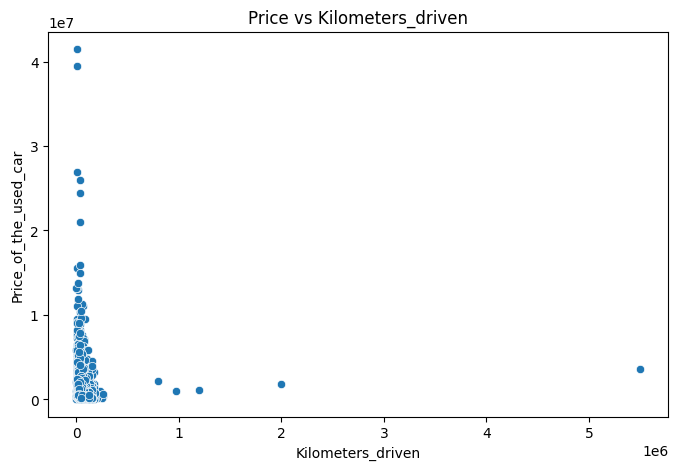

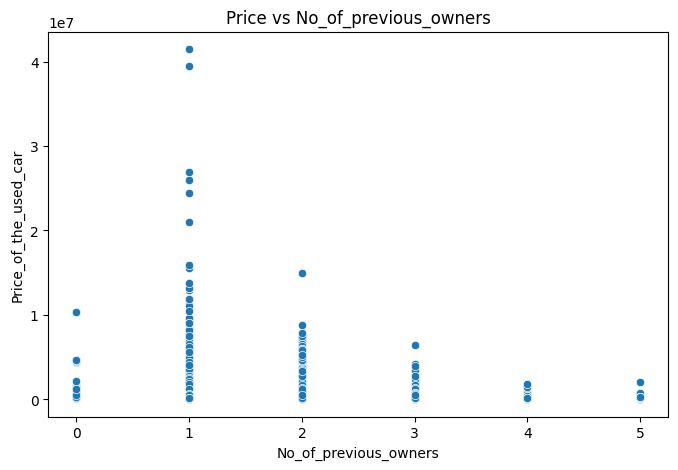

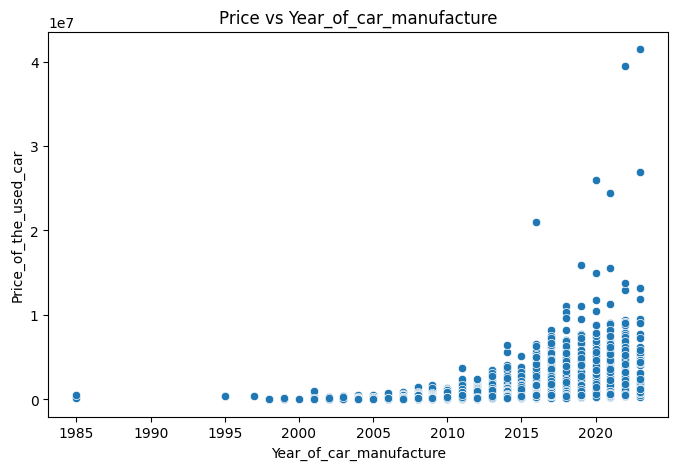

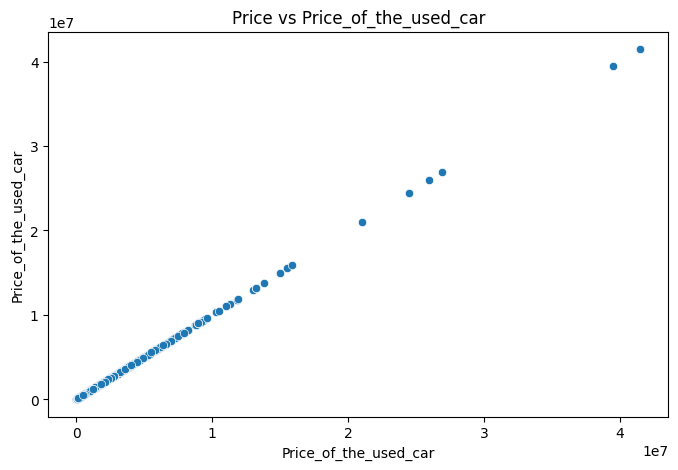

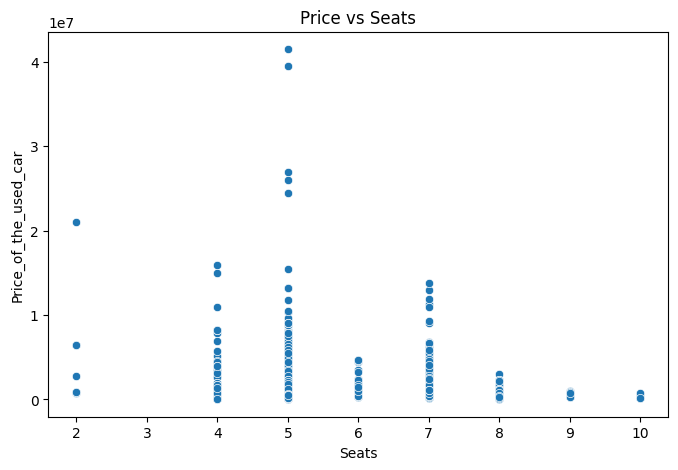

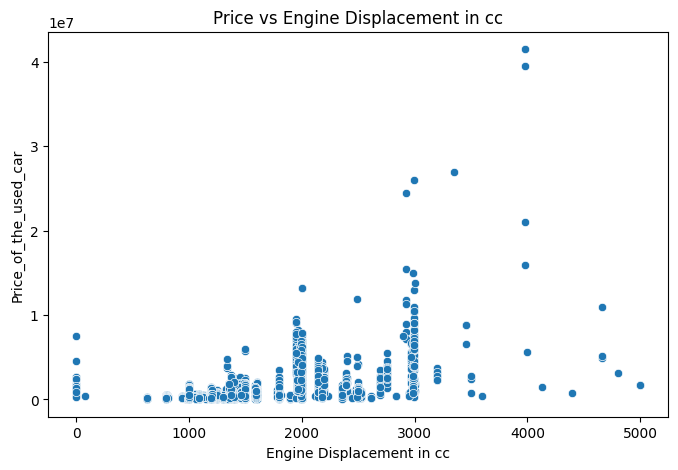

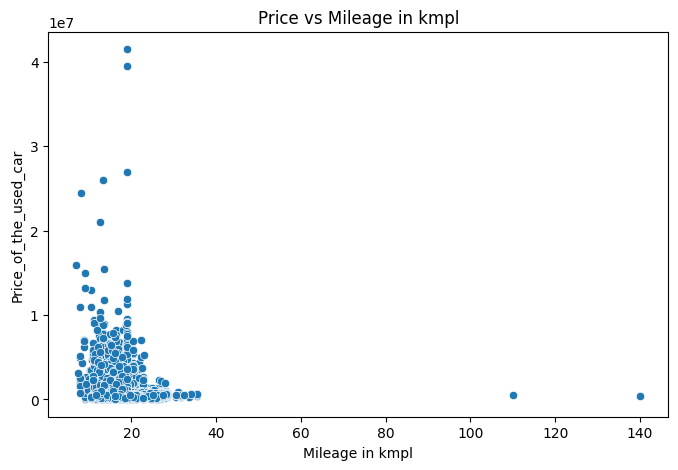

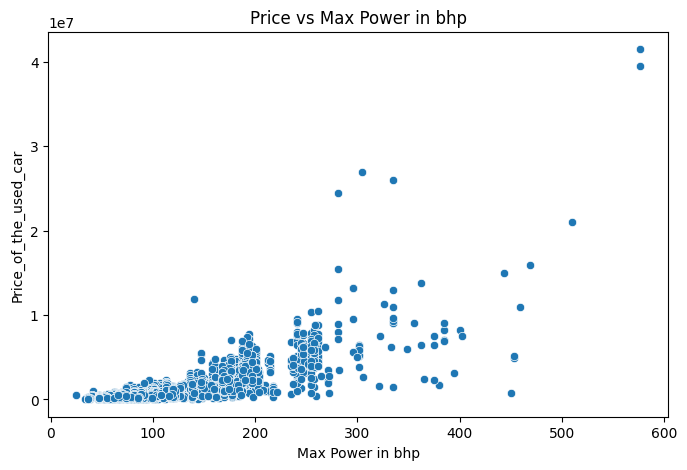

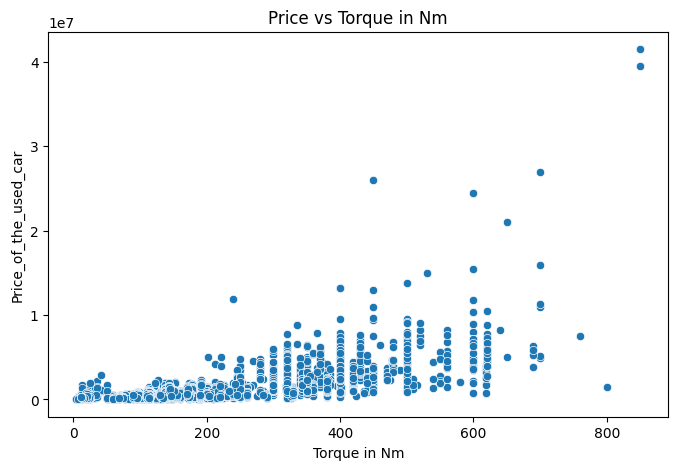

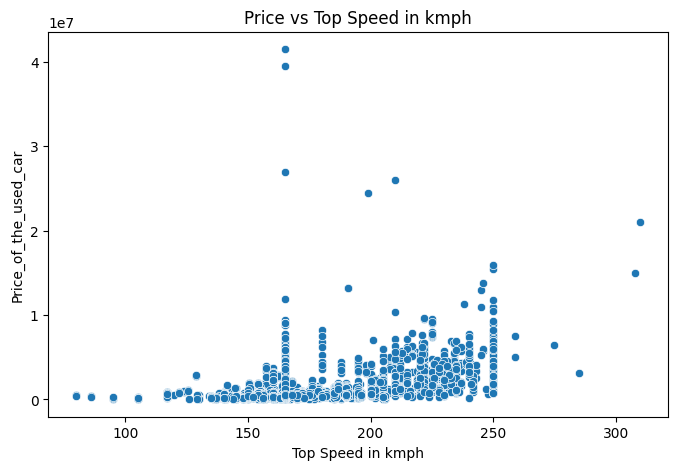

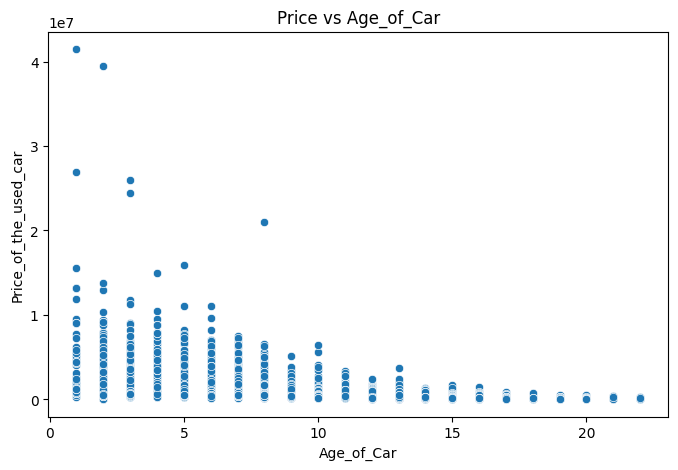

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for car price vs other numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=all_cities_df[col], y=all_cities_df['Price_of_the_used_car'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price_of_the_used_car')
    plt.show()

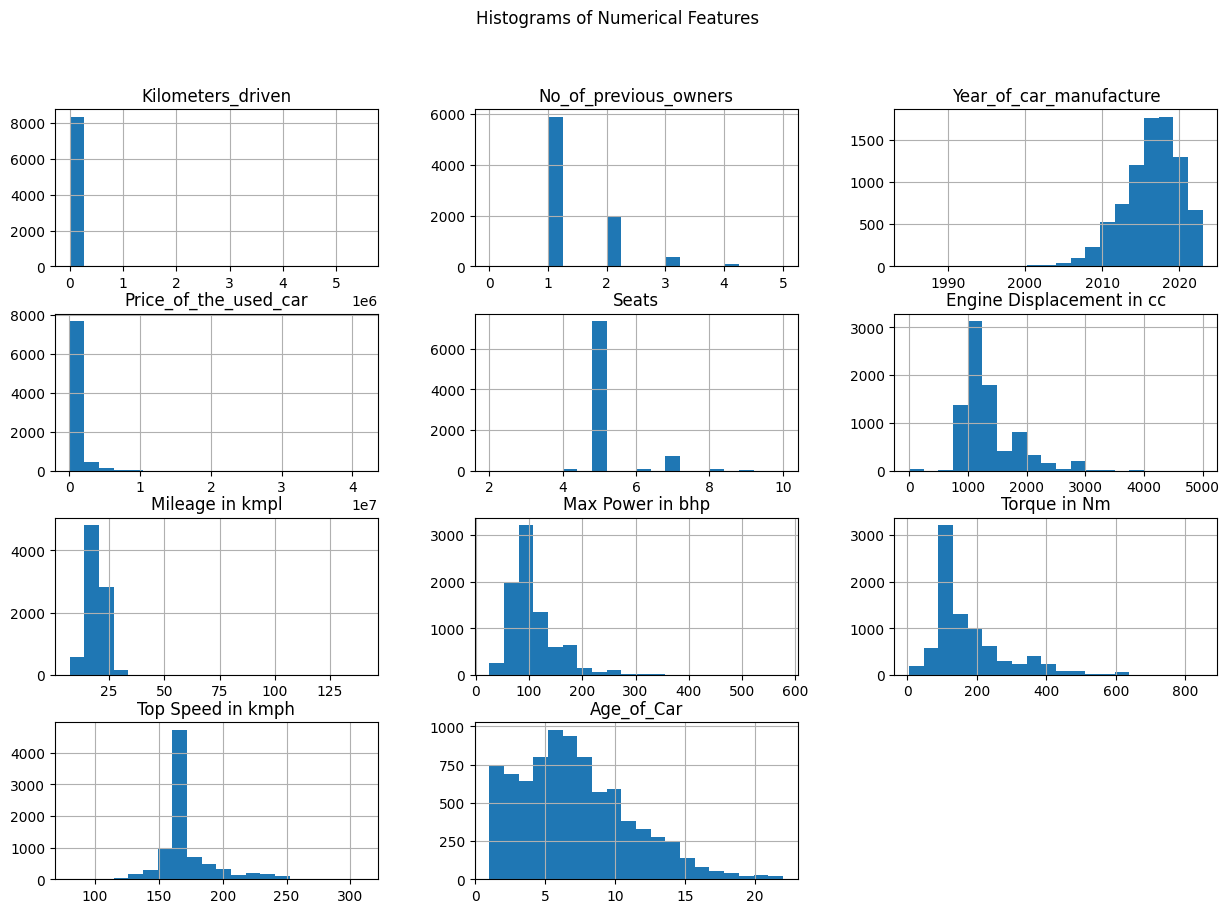

In [29]:
# histogram
# Histograms
all_cities_df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

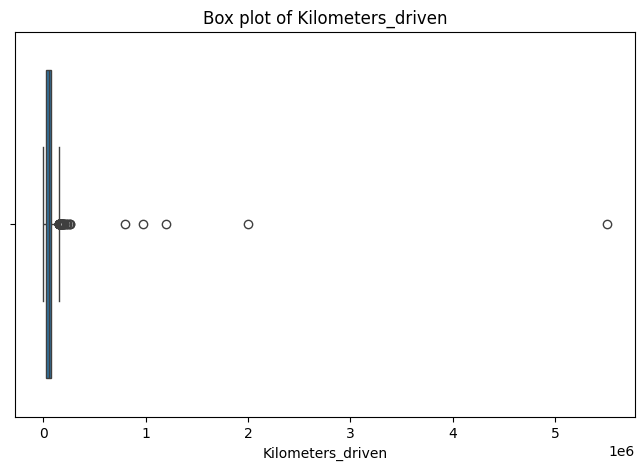

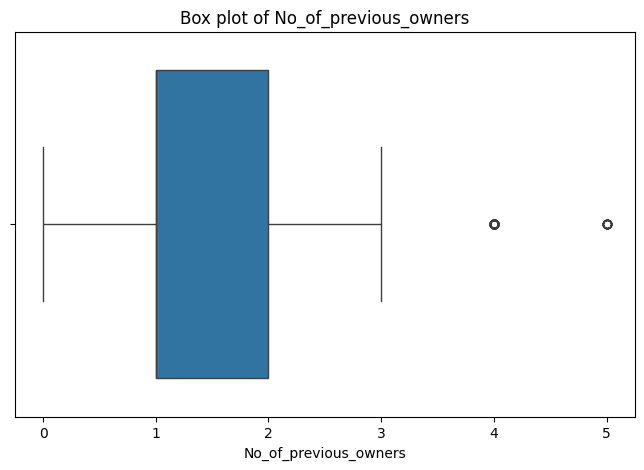

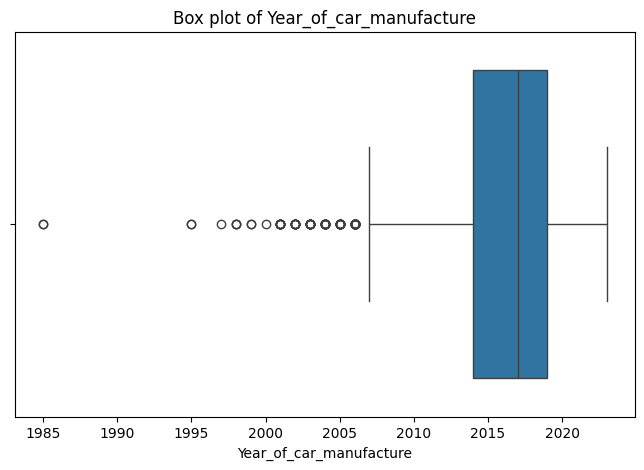

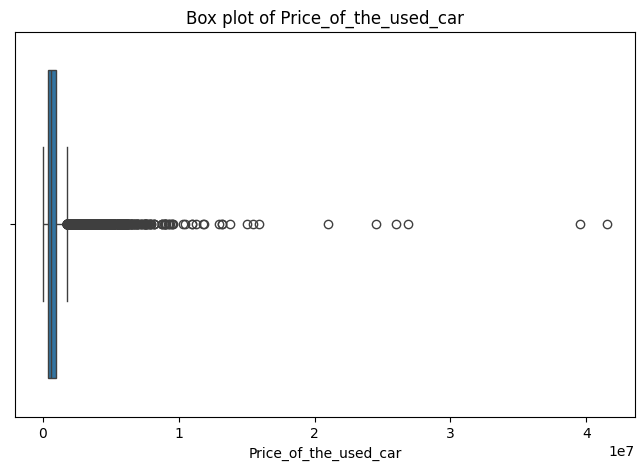

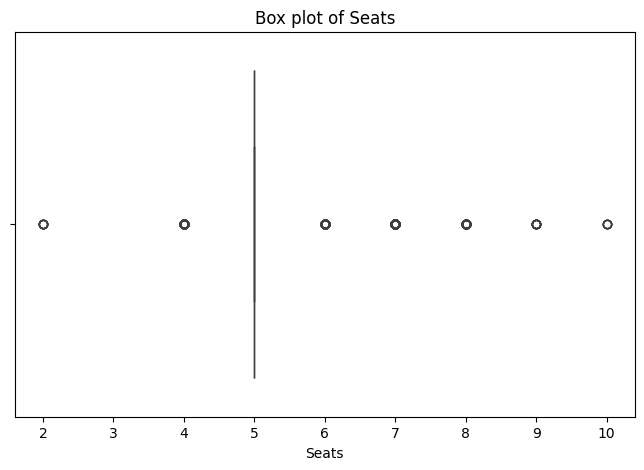

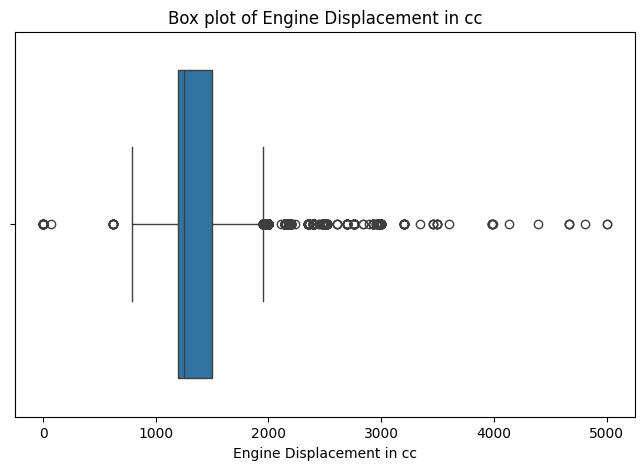

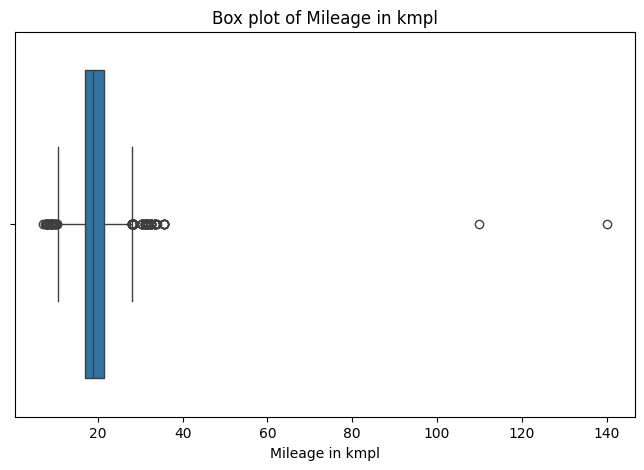

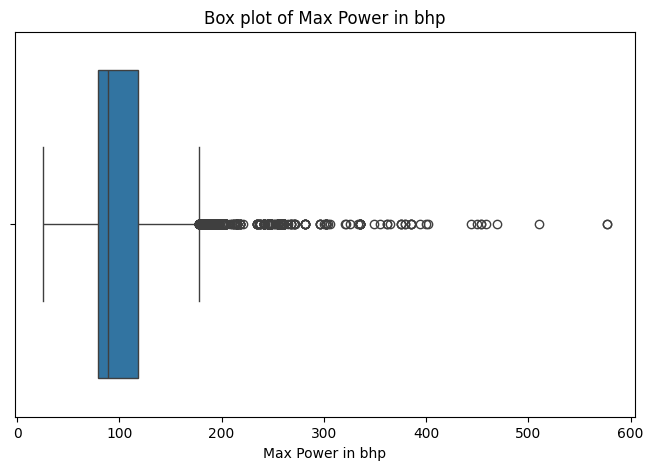

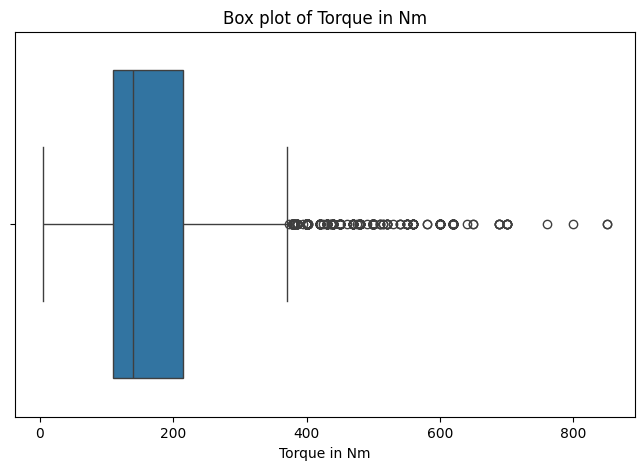

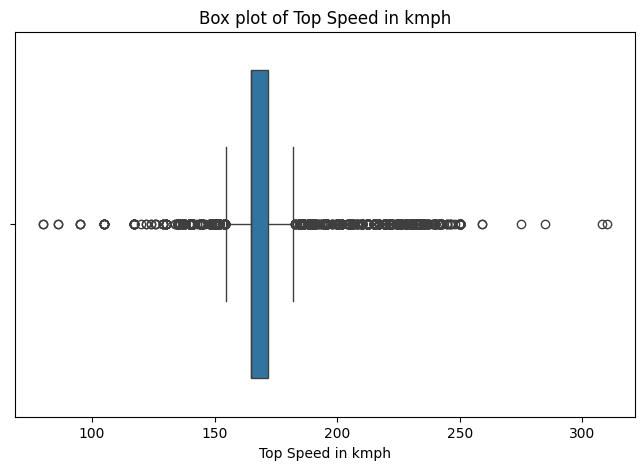

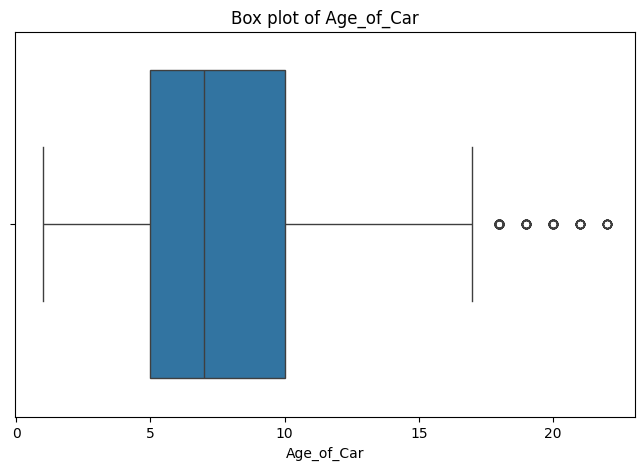

In [30]:
# Box plots for numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=all_cities_df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

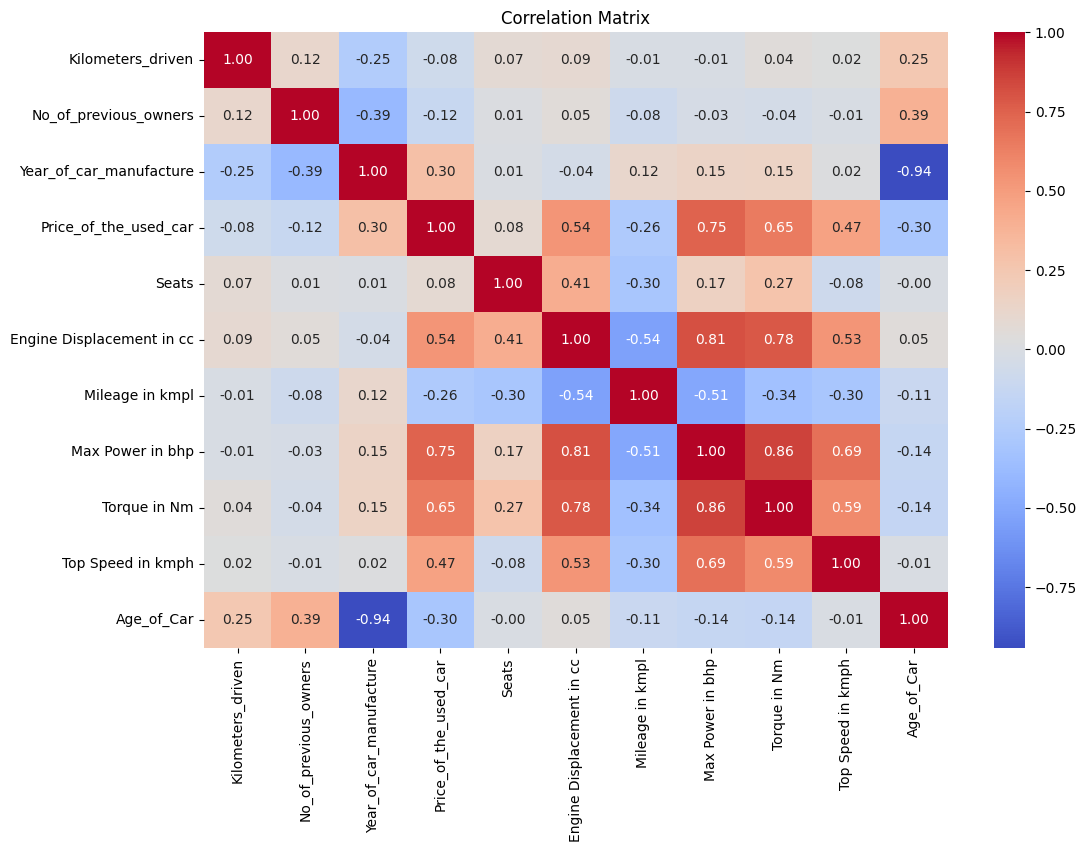

In [31]:
# Correlation matrix
numeric_df = all_cities_df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [32]:
# Feature selection
# Correlation Analysis
# Correlation with target variable
corr_with_target = corr_matrix['Price_of_the_used_car'].sort_values(ascending=False)
print(corr_with_target)

Price_of_the_used_car        1.000000
Max Power in bhp             0.748976
Torque in Nm                 0.649274
Engine Displacement in cc    0.536106
Top Speed in kmph            0.469198
Year_of_car_manufacture      0.299459
Seats                        0.083875
Kilometers_driven           -0.077351
No_of_previous_owners       -0.120489
Mileage in kmpl             -0.264875
Age_of_Car                  -0.298311
Name: Price_of_the_used_car, dtype: float64


# Model Development

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
X = all_cities_df.drop(columns=['Price_of_the_used_car'])  # Features
y = all_cities_df['Price_of_the_used_car']  # Target variable
numerical_cols = ['Kilometers_driven', 'No_of_previous_owners', 'Year_of_car_manufacture',
        'Seats', 'Engine Displacement in cc',
       'Mileage in kmpl', 'Max Power in bhp', 'Torque in Nm',
       'Top Speed in kmph', 'Age_of_Car']

categorical_cols = ['City', 'Fuel_type', 'Body_type', 'Transmission_type',
       'Original_Equipment_Manufacturer', 'Car_model', 'Variant_name', 'Color',
       'Drive Type']
# Apply MinMaxScaler to numerical columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Save the MinMaxScaler
scaler_filename = "scaler.joblib"
joblib.dump(scaler, scaler_filename)

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoder if needed later

# Save each LabelEncoder
label_encoders_filename = "label_encoders.joblib"
joblib.dump(label_encoders, label_encoders_filename)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define different models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set

    # Evaluate the model
    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
    print("-" * 30)

Model: Linear Regression
Mean Absolute Error: 412038.15106557903
Mean Squared Error: 1158351345921.8835
R^2 Score: 0.6119153289225034
------------------------------
Model: Decision Tree
Mean Absolute Error: 180461.0770609319
Mean Squared Error: 290409712160.4642
R^2 Score: 0.902703477646665
------------------------------
Model: Random Forest
Mean Absolute Error: 147443.98292256927
Mean Squared Error: 332210393087.22327
R^2 Score: 0.8886989154165705
------------------------------
Model: Gradient Boosting
Mean Absolute Error: 187544.59437951556
Mean Squared Error: 327849951377.9417
R^2 Score: 0.8901598025579865
------------------------------
Model: KNN
Mean Absolute Error: 381864.6695340502
Mean Squared Error: 1782332400956.9355
R^2 Score: 0.4028617603706024
------------------------------


In [44]:
X_train.columns
len(X_train.columns)

19

Max Power in bhp                   0.702576
Year_of_car_manufacture            0.071272
Torque in Nm                       0.063550
Age_of_Car                         0.040776
Mileage in kmpl                    0.019227
Top Speed in kmph                  0.018540
Variant_name                       0.015953
Car_model                          0.013662
Kilometers_driven                  0.012633
Engine Displacement in cc          0.010617
City                               0.006543
Color                              0.004857
Body_type                          0.004841
Original_Equipment_Manufacturer    0.004697
Drive Type                         0.003613
Seats                              0.002122
Transmission_type                  0.001645
No_of_previous_owners              0.001644
Fuel_type                          0.001233
dtype: float64


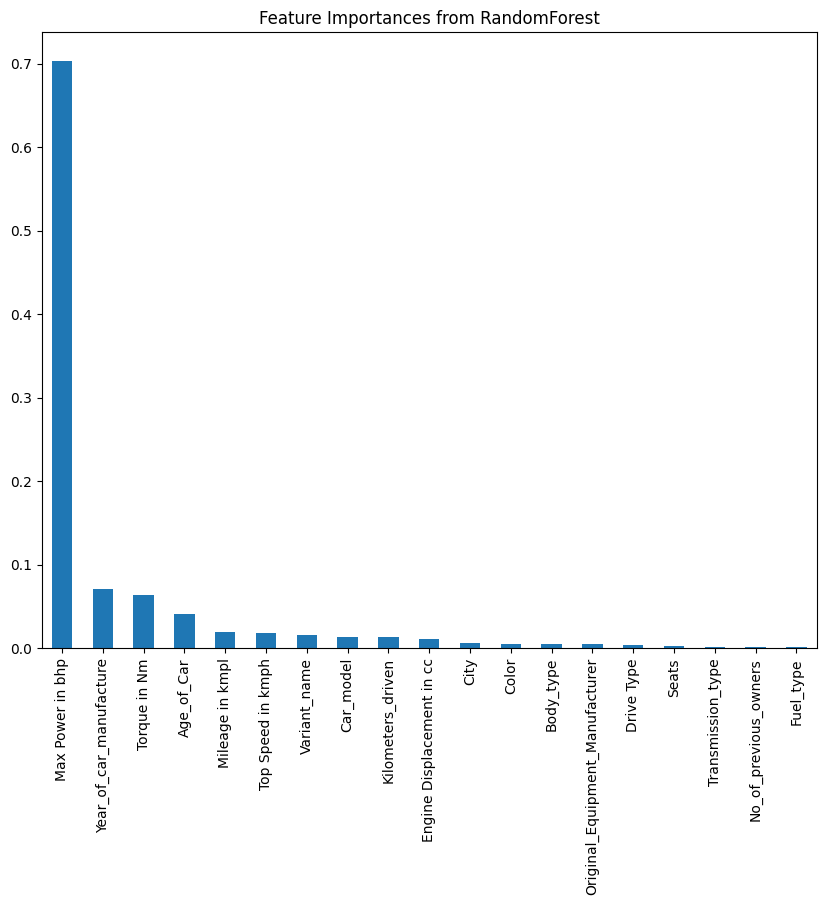

In [34]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Fit a RandomForest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from RandomForest')
plt.show()

In [35]:
# model training
#cross-validation techniques
from sklearn.model_selection import cross_val_score

# Define the models as before
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for name, model in models.items():
    # Cross-validation: using 5 folds
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Store the mean and standard deviation of the scores
    cv_results[name] = {
        'Mean CV MSE': -scores.mean(),
        'Std CV MSE': scores.std()
    }
    
    print(f"Model: {name}")
    print(f"Mean CV MSE: {-scores.mean()}")
    print(f"Std CV MSE: {scores.std()}")
    print("-" * 30)

Model: Linear Regression
Mean CV MSE: 654406233802.4586
Std CV MSE: 231745025454.2517
------------------------------
Model: Decision Tree
Mean CV MSE: 477977757802.81885
Std CV MSE: 319085347111.63947
------------------------------
Model: Random Forest
Mean CV MSE: 330877832238.5709
Std CV MSE: 232406215603.5989
------------------------------
Model: Gradient Boosting
Mean CV MSE: 310863941689.7746
Std CV MSE: 174815632361.02258
------------------------------
Model: KNN
Mean CV MSE: 1132621143448.2876
Std CV MSE: 418999593820.6712
------------------------------


In [36]:
#Training the best model ( Random Forest) on the entire training set
best_model = models['Random Forest']
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_final = best_model.predict(X_test)

# Final evaluation metrics
print(f"Final Mean Absolute Error: {mean_absolute_error(y_test, y_pred_final)}")
print(f"Final Mean Squared Error: {mean_squared_error(y_test, y_pred_final)}")
print(f"Final R^2 Score: {r2_score(y_test, y_pred_final)}")

Final Mean Absolute Error: 147443.98292256927
Final Mean Squared Error: 332210393087.22327
Final R^2 Score: 0.8886989154165705


In [37]:
#grid search hyperparameter tuning for Random forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [39]:
# Train the Random Forest model with the best parameters
best_params = {'max_depth': None, 
               'min_samples_leaf': 2, 
               'min_samples_split': 2, 
               'n_estimators': 100}

# Initialize the RandomForestRegressor with the best parameters
best_rf = RandomForestRegressor(
    max_depth=best_params['max_depth'], 
    min_samples_leaf=best_params['min_samples_leaf'], 
    min_samples_split=best_params['min_samples_split'], 
    n_estimators=best_params['n_estimators'], 
    random_state=42
)

# Train the model on the entire training set
best_rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_final = best_rf.predict(X_test)

# Final evaluation metrics
print(f"Final Mean Absolute Error: {mean_absolute_error(y_test, y_pred_final)}")
print(f"Final Mean Squared Error: {mean_squared_error(y_test, y_pred_final)}")
print(f"Final R^2 Score: {r2_score(y_test, y_pred_final)}")

Final Mean Absolute Error: 155706.98121489605
Final Mean Squared Error: 432627337724.5352
Final R^2 Score: 0.8550560340340108


In [45]:
X_train.columns

Index(['City', 'Fuel_type', 'Body_type', 'Kilometers_driven',
       'Transmission_type', 'No_of_previous_owners',
       'Original_Equipment_Manufacturer', 'Car_model',
       'Year_of_car_manufacture', 'Variant_name', 'Seats', 'Color',
       'Drive Type', 'Engine Displacement in cc', 'Mileage in kmpl',
       'Max Power in bhp', 'Torque in Nm', 'Top Speed in kmph', 'Age_of_Car'],
      dtype='object')

In [41]:
import joblib

# Save the trained Random Forest model
model_filename = "random_forest_model.joblib"
joblib.dump(best_rf, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_model.joblib
